# data format

## load data

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

np.random.seed(29)

In [2]:
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SV_2008_2015.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SD_2017_2019.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SS_2015_2018.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_LB_2008_2015.csv', sep = ',')


data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data = data[data.datetime.dt.year == 2008]

In [3]:
## PESCADORES
grid_lon = np.arange(-77.7, -77, 0.1)
grid_lat = np.arange(-12.1, -11.3, 0.1)

fieldwork = (-77.264, -11.773)

# ## FERNANDO DE NORONHA
# grid_lon = np.arange(-33, -30.8, 0.1)
# grid_lat = np.arange(-4.75, -2, 0.1)

# fieldwork = (-32.392, -3.819)

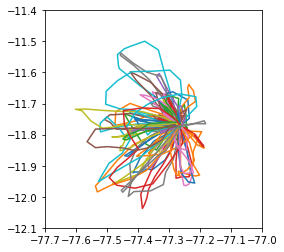

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

format_data = pd.DataFrame()

for t in data.trip.unique():
    traj = data[data.trip ==t].copy()
    
    
    traj['dive'] = traj.prediction
    traj = traj.loc[:,('trip', 'datetime', 'lon', 'lat', 'dive')]
    traj = traj.set_index('datetime')
    traj = traj.resample('8min').agg({'trip':np.unique, 'lon': np.median, 'lat': np.median, 'dive': np.max})
    
    traj['datetime'] = traj.index
    format_data = format_data.append(traj, ignore_index = True)
    
    plt.plot(traj.lon, traj.lat)
#     plt.scatter(traj.lon, traj.lat, s = 10*traj.dive)

    
    
plt.xlim([min(grid_lon), max(grid_lon)])
plt.ylim([min(grid_lat), max(grid_lat)])

# plt.vlines(x = grid_lon, ymin = min(grid_lat), ymax = max(grid_lat), colors = 'grey') 
# plt.hlines(y = grid_lat, xmin = min(grid_lon), xmax = max(grid_lon), colors = 'grey') 
ax.set_aspect(1)

In [5]:
len(format_data.trip.unique())

78

(array([ 8., 19.,  9., 14.,  8.,  3.,  8.,  4.,  4.,  1.]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <a list of 10 Patch objects>)

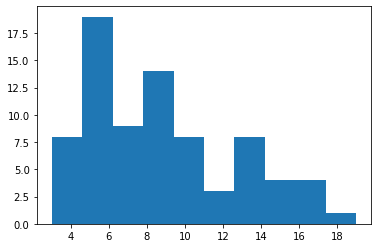

In [6]:
plt.hist([np.sum(format_data.trip == t) for t in format_data.trip.unique()])

# 1. GAN selection 20 steps

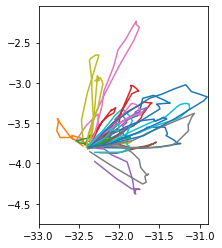

31 trips 



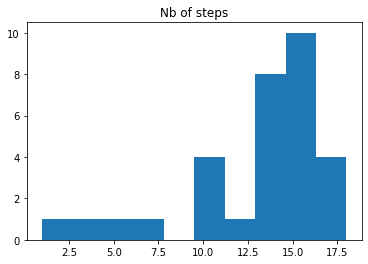

In [7]:
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SV_2008_2015.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SD_2017_2019.csv', sep = ',')
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SS_2015_2018.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_LB_2008_2015.csv', sep = ',')


data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
# data = data[data.datetime.dt.year == 2008]



# ## PESCADORES
# grid_lon = np.arange(-77.7, -77, 0.1)
# grid_lat = np.arange(-12.1, -11.3, 0.1)

# fieldwork = (-77.264, -11.773)

## FERNANDO DE NORONHA
grid_lon = np.arange(-33, -30.8, 0.1)
grid_lat = np.arange(-4.75, -2, 0.1)

fieldwork = (-32.392, -3.819)


fig = plt.figure()
ax = fig.add_subplot()

format_data = pd.DataFrame()

for t in data.trip.unique():
    traj = data[data.trip ==t].copy()
    
    
    traj['dive'] = traj.prediction
    traj = traj.loc[:,('trip', 'datetime', 'lon', 'lat', 'dive')]
    traj = traj.set_index('datetime')
    traj = traj.resample('60min').agg({'trip':np.unique, 'lon': np.median, 'lat': np.median, 'dive': np.max})
    
    traj['datetime'] = traj.index
    format_data = format_data.append(traj, ignore_index = True)
    
    plt.plot(traj.lon, traj.lat)
#     plt.scatter(traj.lon, traj.lat, s = 10*traj.dive)

    
    
plt.xlim([min(grid_lon), max(grid_lon)])
plt.ylim([min(grid_lat), max(grid_lat)])

# plt.vlines(x = grid_lon, ymin = min(grid_lat), ymax = max(grid_lat), colors = 'grey') 
# plt.hlines(y = grid_lat, xmin = min(grid_lon), xmax = max(grid_lon), colors = 'grey') 
ax.set_aspect(1)
plt.show()

print(str(len(format_data.trip.unique())) + ' trips \n')

plt.hist([np.sum(format_data.trip == t) for t in format_data.trip.unique()])
plt.title('Nb of steps')
plt.show()

In [8]:
format_data.to_csv('/home/amdroy/MEGA/SCRIPT/BirdGAN/data/trips_SS_20_steps.csv', index = False)

# 2. GAN vs HMM - 200 steps

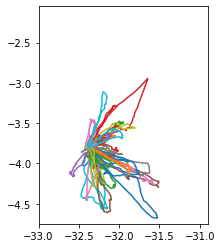

50 trips 



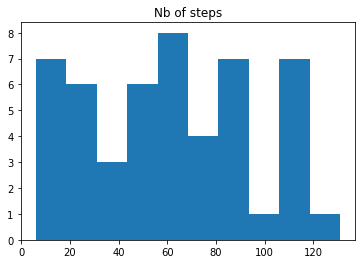

In [9]:
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SV_2008_2015.csv', sep = ',')
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SD_2017_2019.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SS_2015_2018.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_LB_2008_2015.csv', sep = ',')


data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
# data = data[data.datetime.dt.year == 2013]



# ## PESCADORES
# grid_lon = np.arange(-77.7, -77, 0.1)
# grid_lat = np.arange(-12.1, -11.3, 0.1)

# fieldwork = (-77.264, -11.773)

## FERNANDO DE NORONHA
grid_lon = np.arange(-33, -30.8, 0.1)
grid_lat = np.arange(-4.75, -2, 0.1)

fieldwork = (-32.392, -3.819)


fig = plt.figure()
ax = fig.add_subplot()

format_data = pd.DataFrame()

for t in data.trip.unique():
    traj = data[data.trip ==t].copy()
    
    
    traj['dive'] = traj.prediction
    traj = traj.loc[:,('trip', 'datetime', 'lon', 'lat', 'dive')]
    traj = traj.set_index('datetime')
    traj = traj.resample('5min').agg({'trip':np.unique, 'lon': np.median, 'lat': np.median, 'dive': np.max})
    
    traj['datetime'] = traj.index
    format_data = format_data.append(traj, ignore_index = True)
    
    plt.plot(traj.lon, traj.lat)
#     plt.scatter(traj.lon, traj.lat, s = 10*traj.dive)

    
    
plt.xlim([min(grid_lon), max(grid_lon)])
plt.ylim([min(grid_lat), max(grid_lat)])

# plt.vlines(x = grid_lon, ymin = min(grid_lat), ymax = max(grid_lat), colors = 'grey') 
# plt.hlines(y = grid_lat, xmin = min(grid_lon), xmax = max(grid_lon), colors = 'grey') 
ax.set_aspect(1)
plt.show()

print(str(len(format_data.trip.unique())) + ' trips \n')

plt.hist([np.sum(format_data.trip == t) for t in format_data.trip.unique()])
plt.title('Nb of steps')
plt.show()

In [10]:
format_data.to_csv('/home/amdroy/MEGA/SCRIPT/BirdGAN/data/trips_SD_200_steps.csv', index = False)

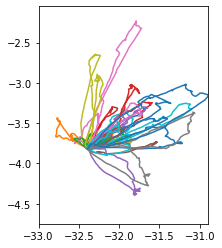

31 trips 



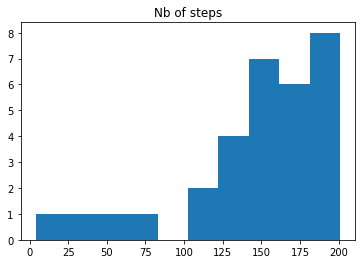

In [11]:
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SV_2008_2015.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SD_2017_2019.csv', sep = ',')
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SS_2015_2018.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_LB_2008_2015.csv', sep = ',')


data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
# data = data[data.datetime.dt.year == 2013]



# ## PESCADORES
# grid_lon = np.arange(-77.7, -77, 0.1)
# grid_lat = np.arange(-12.1, -11.3, 0.1)

# fieldwork = (-77.264, -11.773)

## FERNANDO DE NORONHA
grid_lon = np.arange(-33, -30.8, 0.1)
grid_lat = np.arange(-4.75, -2, 0.1)

fieldwork = (-32.392, -3.819)


fig = plt.figure()
ax = fig.add_subplot()

format_data = pd.DataFrame()

for t in data.trip.unique():
    traj = data[data.trip ==t].copy()
    
    
    traj['dive'] = traj.prediction
    traj = traj.loc[:,('trip', 'datetime', 'lon', 'lat', 'dive')]
    traj = traj.set_index('datetime')
    traj = traj.resample('5min').agg({'trip':np.unique, 'lon': np.median, 'lat': np.median, 'dive': np.max})
    
    traj['datetime'] = traj.index
    format_data = format_data.append(traj, ignore_index = True)
    
    plt.plot(traj.lon, traj.lat)
#     plt.scatter(traj.lon, traj.lat, s = 10*traj.dive)

    
    
plt.xlim([min(grid_lon), max(grid_lon)])
plt.ylim([min(grid_lat), max(grid_lat)])

# plt.vlines(x = grid_lon, ymin = min(grid_lat), ymax = max(grid_lat), colors = 'grey') 
# plt.hlines(y = grid_lat, xmin = min(grid_lon), xmax = max(grid_lon), colors = 'grey') 
ax.set_aspect(1)
plt.show()

print(str(len(format_data.trip.unique())) + ' trips \n')

plt.hist([np.sum(format_data.trip == t) for t in format_data.trip.unique()])
plt.title('Nb of steps')
plt.show()

In [12]:
format_data.to_csv('/home/amdroy/MEGA/SCRIPT/BirdGAN/data/trips_SS_200_steps.csv', index = False)

# 3. Averaged Spatial Distribution - 200 steps

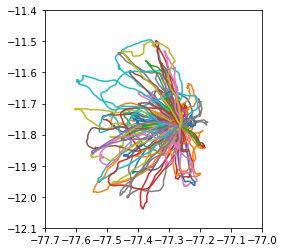

109 trips 



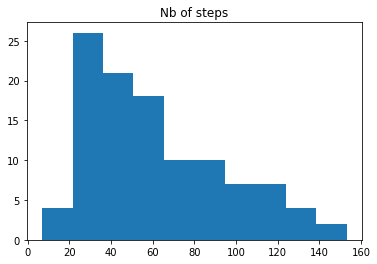

In [13]:
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SV_2008_2015.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SD_2017_2019.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_SS_2015_2018.csv', sep = ',')
# data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/subsets/trips_LB_2008_2015.csv', sep = ',')

data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data = data[data.datetime.dt.year <= 2009]

## PESCADORES
grid_lon = np.arange(-77.7, -77, 0.1)
grid_lat = np.arange(-12.1, -11.3, 0.1)

fieldwork = (-77.264, -11.773)

# ## FERNANDO DE NORONHA
# grid_lon = np.arange(-33, -30.8, 0.1)
# grid_lat = np.arange(-4.75, -2, 0.1)

# fieldwork = (-32.392, -3.819)

fig = plt.figure()
ax = fig.add_subplot()

format_data = pd.DataFrame()

for t in data.trip.unique():
    traj = data[data.trip ==t].copy()
    
    
    traj['dive'] = traj.prediction
    traj = traj.loc[:,('trip', 'datetime', 'lon', 'lat', 'dive')]
    traj = traj.set_index('datetime')
    traj = traj.resample('1min').agg({'trip':np.unique, 'lon': np.median, 'lat': np.median, 'dive': np.max})
    
    traj['datetime'] = traj.index
    format_data = format_data.append(traj, ignore_index = True)
    
    plt.plot(traj.lon, traj.lat)
#     plt.scatter(traj.lon, traj.lat, s = 10*traj.dive)

    
plt.xlim([min(grid_lon), max(grid_lon)])
plt.ylim([min(grid_lat), max(grid_lat)])

# plt.vlines(x = grid_lon, ymin = min(grid_lat), ymax = max(grid_lat), colors = 'grey') 
# plt.hlines(y = grid_lat, xmin = min(grid_lon), xmax = max(grid_lon), colors = 'grey') 
ax.set_aspect(1)
plt.show()

print(str(len(format_data.trip.unique())) + ' trips \n')

plt.hist([np.sum(format_data.trip == t) for t in format_data.trip.unique()])
plt.title('Nb of steps')
plt.show()

In [14]:
# shuffle trajectories
trips = np.array(format_data.trip.unique())
np.random.shuffle(trips)

format_data_shuffle = pd.DataFrame()

for tt in trips:
    dd = format_data[format_data.trip == tt].copy()
    format_data_shuffle = format_data_shuffle.append(dd, ignore_index = True)

In [15]:
format_data_shuffle.to_csv('/home/amdroy/MEGA/SCRIPT/BirdGAN/data/trips_SV_200_steps.csv', index = False)

# Explore statistics

In [ ]:
data = pd.read_table('/home/amdroy/MEGA/SCRIPT/BirdGAN/data/trips_SV_2008_formatted.csv', sep = ',')
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
from utils.tools import *

In [ ]:
colony = (-77.264, -11.773)
scale = 30000

data = format_data(data, colony, scale)
data = data[data.dist_colony > 1000]
traj = padding_data(data, 200)
data_fake = format_simulation(traj, colony, scale)
data_fake = data_fake[data_fake.dist_colony > 1000]

In [ ]:
get_score(data, data_fake)

## Sliding Sinuosity 

In [ ]:
import scipy.fftpack

data = format_data(data, colony, scale)
data = data[data.dist_colony > 1000]
traj = padding_data(data, 200)
data_fake = format_simulation(traj, colony, scale)

In [ ]:
window = 10

# Number of sample points
N = 200
T = 1/60
periodogram = 0

for tt in data_fake.trip.unique():
    traj = data_fake[data_fake.trip == tt].copy()
    
    sinuosity = []
    for i in range(1, len(traj)-window):
        
        D = dist_ortho(traj.lon.values[i], traj.lat.values[i], 
                       traj.lon.values[i+window], traj.lat.values[i+window])
    
        L = np.sum(traj.step_distance.values[i:i+window+1])
        
        if L !=0:
            sinuosity.append(D/L)
        else :
            sinuosity.append(0)
        
        
    yf = scipy.fftpack.fft(np.array(sinuosity))
    xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
    periodogram += 2.0/N * np.abs(yf[:N//2])
    
#     fig, ax = plt.subplots()
#     ax.plot(xf, periodogram)
#     plt.show()
        
    plt.plot(sinuosity)
    plt.show()
#     plt.plot(traj[i,0,:], traj[i,1,:])

# fig, ax = plt.subplots()
# ax.plot(xf, periodogram)
# plt.show()

## Fourier Analysis

In [ ]:
data = format_data(data)
data = data[data.dist_colony > 1000]
traj = padding_data(data, 200)

In [ ]:
import scipy.signal

In [ ]:
periodogram = 0

for j in range(traj.shape[0]):
    y = traj[j, 2, :]
    
    x, y = scipy.signal.periodogram(y, detrend = False, scaling = 'density')
    periodogram += y
    

fig, ax = plt.subplots()
ax.plot(x, periodogram/traj.shape[0])
plt.show()

In [ ]:
periodogram = 0

# Number of sample points
N = 200
T = 1/60

for j in range(traj.shape[0]):
    y = traj[j, 2, :]
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
    periodogram += 2.0/N * np.abs(yf[:N//2])
#     plt.plot(y)
#     plt.show()

fig, ax = plt.subplots()
ax.plot(xf, periodogram/traj.shape[0])
plt.show()

In [ ]:
x, y = scipy.signal.periodogram(y)

In [ ]:
len(y)

In [ ]:
plt.plot(x, y)

In [ ]:
get_nb_dive(data_fake)

## GEBCO

In [ ]:
# load netcdf --
f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
elevation = np.array(f.variables['elevation'])
lon,lat = np.array(f.variables['lon']), np.array(f.variables['lat'])
data = np.array(elevation)

# interpolate map on grid --
f = interp2d(lon,lat,data,kind="linear")
grid_data = f(grid_lon,grid_lat)
lon, lat = np.meshgrid(grid_lon, grid_lat)

# plot map --
colormesh = m.pcolormesh(lon, lat, grid_data, latlon = True, vmin = -500, vmax = 0)
m.drawcoastlines()
m.fillcontinents(color = '#A4A4A4')
m.colorbar(colormesh)
parallels = np.arange(-15,-5,0.2)
m.drawparallels(parallels, labels = [True, False, False, False])
meridians = np.arange(-80,-75,0.2)
m.drawmeridians(meridians, labels = [False, False, False, True])
x,y = m(fieldwork[0], fieldwork[1])
m.scatter(x, y, marker = 's', s = 100, color = 'black')
plt.title('bathymetry')
plt.show()

# save data --
bathy = (None, grid_data)

## GlobColour

In [ ]:
TIME = []
DATA = []

for fw in ['P1108', 'P1109', 'P1110', 'P1111', 'P1112', 'P1113', 'P1115']:
    
    # load netcdf --
    f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/SATELLITE/GlobColour/dataset-oc-glo-bio-multi-l4-chl_interpolated_4km_daily-rep_'+fw+'.nc')
    data,lon,lat = np.array(f.variables['CHL']), np.array(f.variables['lon']), np.array(f.variables['lat'])
    time = np.array(f.variables['time'])
    time = np.array([dt.date(1900,1,1) + dt.timedelta(days=int(t)) for t in time])
        
    # interpolate map on grid --
    grid_data = np.zeros((data.shape[0], len(grid_lat), len(grid_lon)))
    for i in range(data.shape[0]):
        f = interp2d(lon,lat,data[i,:,:],kind="linear")
        grid_data[i,:,:] = f(grid_lon,grid_lat)
    grid_data[grid_data<0] = None    
    lon, lat = np.meshgrid(grid_lon, grid_lat)
    
    # plot map --
    colormesh = m.pcolormesh(lon, lat, grid_data[0,:,:], latlon = True, vmin = 0, vmax = 20)
    m.drawcoastlines()
    m.fillcontinents(color = '#A4A4A4')
    m.colorbar(colormesh)
    parallels = np.arange(-15,-5,0.2)
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = [False, False, False, True])
    x,y = m(fieldwork[0], fieldwork[1])
    m.scatter(x, y, marker = 's', s = 100, color = 'black')
    plt.title(time[0])
    plt.show()
    
    # stack fieldwork data ----
    TIME.append(time)
    DATA.append(grid_data)

# save data --
chl = (np.concatenate(TIME), np.concatenate(DATA))

## OSTIA

In [ ]:
TIME = []
DATA = []

for fw in ['P1108', 'P1109', 'P1110', 'P1111', 'P1112', 'P1113', 'P1115']:
    
    # load netcdf --
    f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/SATELLITE/OSTIA/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_'+fw+'.nc')
    data,lon,lat = np.array(f.variables['analysed_sst']), np.array(f.variables['lon']), np.array(f.variables['lat'])
    time = np.array(f.variables['time'])
    time = np.array([dt.date(1981,1,1) + dt.timedelta(seconds=int(t)) for t in time])
    data = (data-273.15)
    
    # interpolate map on grid --
    grid_data = np.zeros((data.shape[0], len(grid_lat), len(grid_lon)))
    for i in range(data.shape[0]):
        f = interp2d(lon,lat,data[i,:,:],kind="linear")
        grid_data[i,:,:] = f(grid_lon,grid_lat)
    grid_data[grid_data<0] = None    
    lon, lat = np.meshgrid(grid_lon, grid_lat)
    
    # plot map --
    colormesh = m.pcolormesh(lon, lat, grid_data[0,:,:], latlon = True, vmin = 17, vmax = 19)
    m.drawcoastlines()
    m.fillcontinents(color = '#A4A4A4')
    m.colorbar(colormesh)
    parallels = np.arange(-15,-5,0.2)
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = [False, False, False, True])

    x,y = m(fieldwork[0], fieldwork[1])
    m.scatter(x, y, marker = 's', s = 100, color = 'black')

    plt.title(time[0])
    plt.show()

    # stack ---
    TIME.append(time)
    DATA.append(grid_data)


sst = (np.concatenate(TIME), np.concatenate(DATA))

## ASCAT

In [ ]:
TIME = []
DATA_u = []
DATA_v = []

for fw in ['P1108', 'P1109', 'P1110', 'P1111', 'P1112', 'P1113', 'P1115']:

    # load netcdf --
    f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/SATELLITE/ASCAT/CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_'+fw+'.nc')
    data_v, data_u = f.variables['northward_wind'], f.variables['eastward_wind']
    lon,lat =  np.array(f.variables['lon']), np.array(f.variables['lat'])
    time =  np.array(f.variables['time'])
    time = np.array([dt.datetime(1900,1,1) + dt.timedelta(hours=int(t)) for t in time])
    
    # interpolate map on grid --
    grid_data_u = np.zeros((data_u.shape[0], len(grid_lat), len(grid_lon)))
    grid_data_v = np.zeros((data_v.shape[0], len(grid_lat), len(grid_lon)))
    
    for i in range(data_u.shape[0]):
        f_u = interp2d(lon,lat,data_u[i,:,:],kind="linear")
        grid_data_u[i,:,:] = f_u(grid_lon,grid_lat)
        
        f_v = interp2d(lon,lat,data_v[i,:,:],kind="linear")       
        grid_data_v[i,:,:] = f_v(grid_lon,grid_lat)
        
        
    lon, lat = np.meshgrid(grid_lon, grid_lat)
    
    # plot map --
    wind_u = grid_data_u[0,:,:]
    wind_v = grid_data_v[0,:,:]
    colormesh = m.pcolormesh(lon, lat, wind_u**2+wind_v**2, latlon = True, vmin = 0, vmax = 30)
    m.drawcoastlines()
    m.fillcontinents(color = '#A4A4A4')
    m.colorbar(colormesh)
    parallels = np.arange(-15,-5,0.2)
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = [False, False, False, True])
    x,y = m(fieldwork[0], fieldwork[1])
    m.scatter(x, y, marker = 's', s = 100, color = 'black')
    x,y = m(lon,lat)
    m.barbs(x,y,wind_u,wind_v, length=7, color='red')
    plt.title(time[0])
    plt.show()
    
    # stack ---
    TIME.append(time)
    DATA_u.append(grid_data_u)
    DATA_v.append(grid_data_v)
    
wind = (np.concatenate(TIME), (np.concatenate(DATA_u), np.concatenate(DATA_v)))

## Acoustic data
(2008-2012)

In [ ]:
TIME = np.array([2008, 2009, 2010, 2011, 2012])
DATA = []

for fw in ['P1108', 'P1109', 'P1110', 'P1111', 'P1112']:
    
    # load csv --
    fish = pd.read_csv('/home/amdroy/MEGA/DATA/FISH/' + fw + '.csv')
    lon = fish['x1'].unique()
    lat = fish['x2'].unique()
    data = fish['Kriging.nasc.estim'].to_numpy().reshape((len(lat), len(lon)))
    select = fish['select'].to_numpy().reshape((len(lat), len(lon)))
    
    # interpolate map on grid --
    f = interp2d(lon,lat,data,kind="linear")
    grid_data = f(grid_lon,grid_lat)
    f = interp2d(lon,lat,select,kind="linear")
    grid_select = f(grid_lon,grid_lat)
    grid_data[grid_select < 1] = None
    lon, lat = np.meshgrid(grid_lon, grid_lat)

    
    colormesh = m.pcolormesh(lon, lat,grid_data, latlon = True, vmin = 0, vmax = 8000)
    m.drawcoastlines()
    m.fillcontinents(color = '#A4A4A4')
    m.colorbar(colormesh)
    parallels = np.arange(-15,-5,0.2)
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = [False, False, False, True])

    plt.title(fw)
    plt.show()
    
    # stack ---
    DATA.append(grid_data)

acoustic = (TIME, np.stack(DATA))

## external covariates dataset

In [ ]:
external_data = {'bathy':bathy, 'chl':chl, 'sst':sst, 'wind':wind, 'acoustic':acoustic, 'lon':lon, 'lat':lat}

# save Map -------------------------
with open('./data/external_data', 'wb') as f:
    pickle.dump(external_data,f)
# ----------------------------------------------

# Create dataset

In [ ]:
t = data_train.datetime[10000]
t

In [ ]:
def subset_external_data(external_data, t):
    
    t = dt.datetime(t.year, t.month, t.day, 12, 0,0)
    subset_data = external_data
    
    # get index
    i_chl = np.argwhere(external_data['chl'][0] == t.date())
    i_sst = np.argwhere(external_data['sst'][0] == t.date())
    i_wind = np.argwhere(external_data['wind'][0] == t)
    i_ac = np.argwhere(external_data['acoustic'][0] == t.year)
    
    # subset
    labels = ['lon', 'lat', 'chl', 'sst', 'wind_u', 'wind_v', 'acoustic', 'bathy']
    
    maps = [external_data['lon'],external_data['lat'],
            external_data['chl'][1][i_chl,:,:].squeeze(),
            external_data['sst'][1][i_sst,:,:].squeeze(),
            external_data['wind'][1][0][i_wind,:,:].squeeze(),
            external_data['wind'][1][1][i_wind,:,:].squeeze(),
            external_data['acoustic'][1][i_ac,:,:].squeeze(),
            external_data['bathy'][1]]
       
    return (labels, maps)
    

In [ ]:
subset_external_data(external_data,t)

### plot traj woth covariates

In [ ]:
data = pd.read_table('/home/amdroy/MEGA/DATA/FORMAT/trips_SV_2008_2015.csv', sep = ',')
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
t = max(data.datetime)
labels, maps = subset_external_data(external_data,t)

In [ ]:
# for i in data.trip.unique():
#     traj = data[data.trip == i].copy()
#     t = min(traj.datetime)
#     labels, maps = subset_external_data(external_data,t)
    
#     plt.figure(figsize = (12, 8))

#     # CHL
#     if maps[2].shape[0] != 0:
#         plt.subplot(2,3,1)
#         colormesh = m.pcolormesh(maps[0], maps[1], maps[2], latlon = True, vmin = 0, vmax = 20)
#         m.drawcoastlines()
#         m.fillcontinents(color = '#A4A4A4')
#         m.colorbar(colormesh)
#         parallels = np.arange(-15,-5,0.2)
#         m.drawparallels(parallels, labels = [True, False, False, False])
#         meridians = np.arange(-80,-75,0.2)
#         m.drawmeridians(meridians, labels = [False, False, False, True])
#         x,y = m(fieldwork[0], fieldwork[1])
#         m.scatter(x, y, marker = 's', s = 100, color = 'black')
#         x,y = m(traj.lon.values, traj.lat.values)
#         m.scatter(x, y, marker = 'o', s = 5, color = 'red')
#         plt.title(labels[2] + ' : ' + str(t))

#     # SST    
#     if maps[3].shape[0] != 0:
#         plt.subplot(2,3,2)
#         colormesh = m.pcolormesh(maps[0], maps[1], maps[3], latlon = True, vmin = 17, vmax = 19)
#         m.drawcoastlines()
#         m.fillcontinents(color = '#A4A4A4')
#         m.colorbar(colormesh)
#         parallels = np.arange(-15,-5,0.2)
#         m.drawparallels(parallels, labels = [True, False, False, False])
#         meridians = np.arange(-80,-75,0.2)
#         m.drawmeridians(meridians, labels = [False, False, False, True])
#         x,y = m(fieldwork[0], fieldwork[1])
#         m.scatter(x, y, marker = 's', s = 100, color = 'black')
#         x,y = m(traj.lon.values, traj.lat.values)
#         m.scatter(x, y, marker = 'o', s = 5, color = 'red')
#         plt.title(labels[3] + ' : ' + str(t))

#     # WIND
#     if maps[4].shape[0] != 0:
#         plt.subplot(2,3,3)
#         colormesh = m.pcolormesh(maps[0], maps[1], np.sqrt(maps[4]**2+maps[5]**2), latlon = True, vmin = 0, vmax = 7)
#         m.drawcoastlines()
#         m.fillcontinents(color = '#A4A4A4')
#         m.colorbar(colormesh)
#         parallels = np.arange(-15,-5,0.2)
#         m.drawparallels(parallels, labels = [True, False, False, False])
#         meridians = np.arange(-80,-75,0.2)
#         m.drawmeridians(meridians, labels = [False, False, False, True])
#         x,y = m(fieldwork[0], fieldwork[1])
#         m.scatter(x, y, marker = 's', s = 100, color = 'black')
#         x,y = m(lon,lat)
#         m.barbs(x,y,maps[4],maps[5], length=7, color='white')
#         x,y = m(traj.lon.values, traj.lat.values)
#         m.scatter(x, y, marker = 'o', s = 5, color = 'red')
#         plt.title(labels[4] + ' : ' + str(t))

#     # BATHY
#     plt.subplot(2,3,4)
#     colormesh = m.pcolormesh(maps[0], maps[1], maps[7], latlon = True, vmin = -500, vmax = 0)
#     m.drawcoastlines()
#     m.fillcontinents(color = '#A4A4A4')
#     m.colorbar(colormesh)
#     parallels = np.arange(-15,-5,0.2)
#     m.drawparallels(parallels, labels = [True, False, False, False])
#     meridians = np.arange(-80,-75,0.2)
#     m.drawmeridians(meridians, labels = [False, False, False, True])
#     x,y = m(fieldwork[0], fieldwork[1])
#     m.scatter(x, y, marker = 's', s = 100, color = 'black')
#     x,y = m(traj.lon.values, traj.lat.values)
#     m.scatter(x, y, marker = 'o', s = 5, color = 'red')
#     plt.title(labels[7] + ' : ' + str(t))

#     # ACOUSTIC
#     if maps[6].shape[0] != 0:
#         plt.subplot(2,3,5)
#         colormesh = m.pcolormesh(maps[0], maps[1], maps[6], latlon = True, vmin = 0, vmax = 8000)
#         m.drawcoastlines()
#         m.fillcontinents(color = '#A4A4A4')
#         m.colorbar(colormesh)
#         parallels = np.arange(-15,-5,0.2)
#         m.drawparallels(parallels, labels = [True, False, False, False])
#         meridians = np.arange(-80,-75,0.2)
#         m.drawmeridians(meridians, labels = [False, False, False, True])
#         x,y = m(fieldwork[0], fieldwork[1])
#         m.scatter(x, y, marker = 's', s = 100, color = 'black')
#         x,y = m(traj.lon.values, traj.lat.values)
#         m.scatter(x, y, marker = 'o', s = 5, color = 'red')
#         plt.title(labels[6] + ' : ' + str(t))


#     plt.savefig('./data/trajectory/'+i+'.png')
#     plt.close()

# Visual inspection

In [ ]:
data = data[~data.trip.isin(error)]
data = data[data.datetime.dt.year <= 2012]

In [ ]:
data['lon_std'] = (data['lon'] - fieldwork[0])*2
data['lat_std'] = (data['lat'] - fieldwork[1])*2

In [ ]:
plt.hist(data['lon_std'], alpha = 0.5, label = 'lon')
plt.hist(data['lat_std'], alpha = 0.5, label = 'lat')
plt.title('relative distribution')
plt.legend()

In [ ]:
trajs = data.trip.unique()
np.random.shuffle(trajs)

In [ ]:
nb_train = round(0.8 * len(data.trip.unique()))
nb_test = round(0.2 * len(data.trip.unique()))

In [ ]:
train_trajs = trajs[0:nb_train]
test_trajs = trajs[nb_train:(nb_train+nb_test)]

In [ ]:
data_train = data[data.trip.isin(train_trajs)]
data_test = data[data.trip.isin(test_trajs)]

In [ ]:
(nb_train, nb_test)

In [ ]:
data_train.to_csv('./data/trips_SV_train.csv', index = False)
data_test.to_csv('./data/trips_SV_test.csv', index = False)